<h1> Analisi esplorativa dei dati

Il seguente notebook contiene l'analisi esplorativa dei dati relativa al dataset utilizzato per la classificazione, regressione e clustering.

# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Progetti data science/Progetto Python/Classificazione/songs_spotify.csv"

Mounted at /content/drive


In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from matplotlib import style
from matplotlib import cm
import plotly.express as px

#import optuna
from xgboost import XGBClassifier


#Processing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer, make_column_selector

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, auc, confusion_matrix, f1_score, plot_roc_curve


from sklearn import set_config

# Render modello
from sklearn.tree import plot_tree

# EDA 

In [ ]:
# import file and watching head
df = pd.read_csv(file_path, low_memory=False)

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<h3> Per ogni colonna controlliamo se ci sono valori nulli <h3>

In [ ]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

<h3> Controlliamo se ci sono righe duplicate <h3>

In [ ]:
check = df.duplicated()
Counter(check)

Counter({False: 42305})

<h3> Eliminiamo i dati categorici, tranne la colonna del genere musicale <h3>

In [ ]:
df_class = df.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "song_name","Unnamed: 0", "title" ])

<h3> Analizziamo le distribuzioni <h3>

Text(0.5, 1.0, 'Hisogram plot')

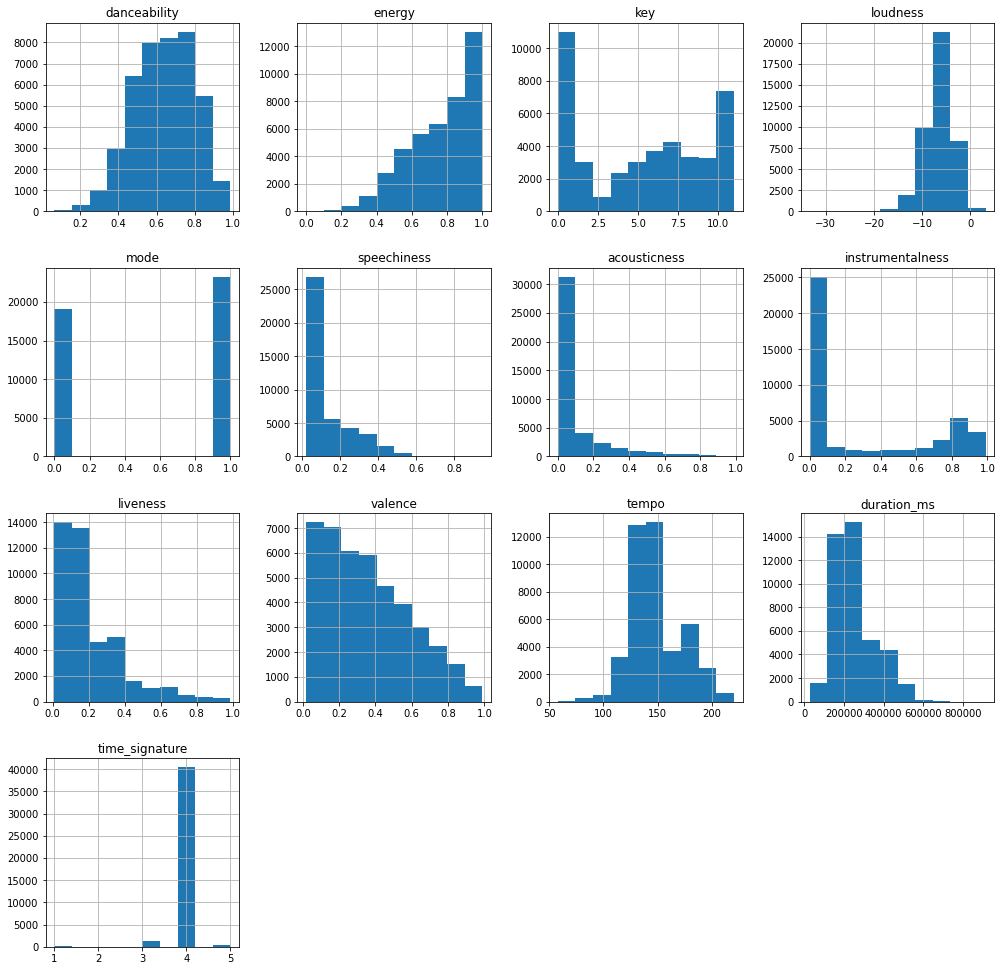

In [ ]:
df_class.hist(figsize=(17, 17))
plt.title("Hisogram plot", size=1, weight='bold')

<h3> Box plot per capire se ci sono outlier <h3> 

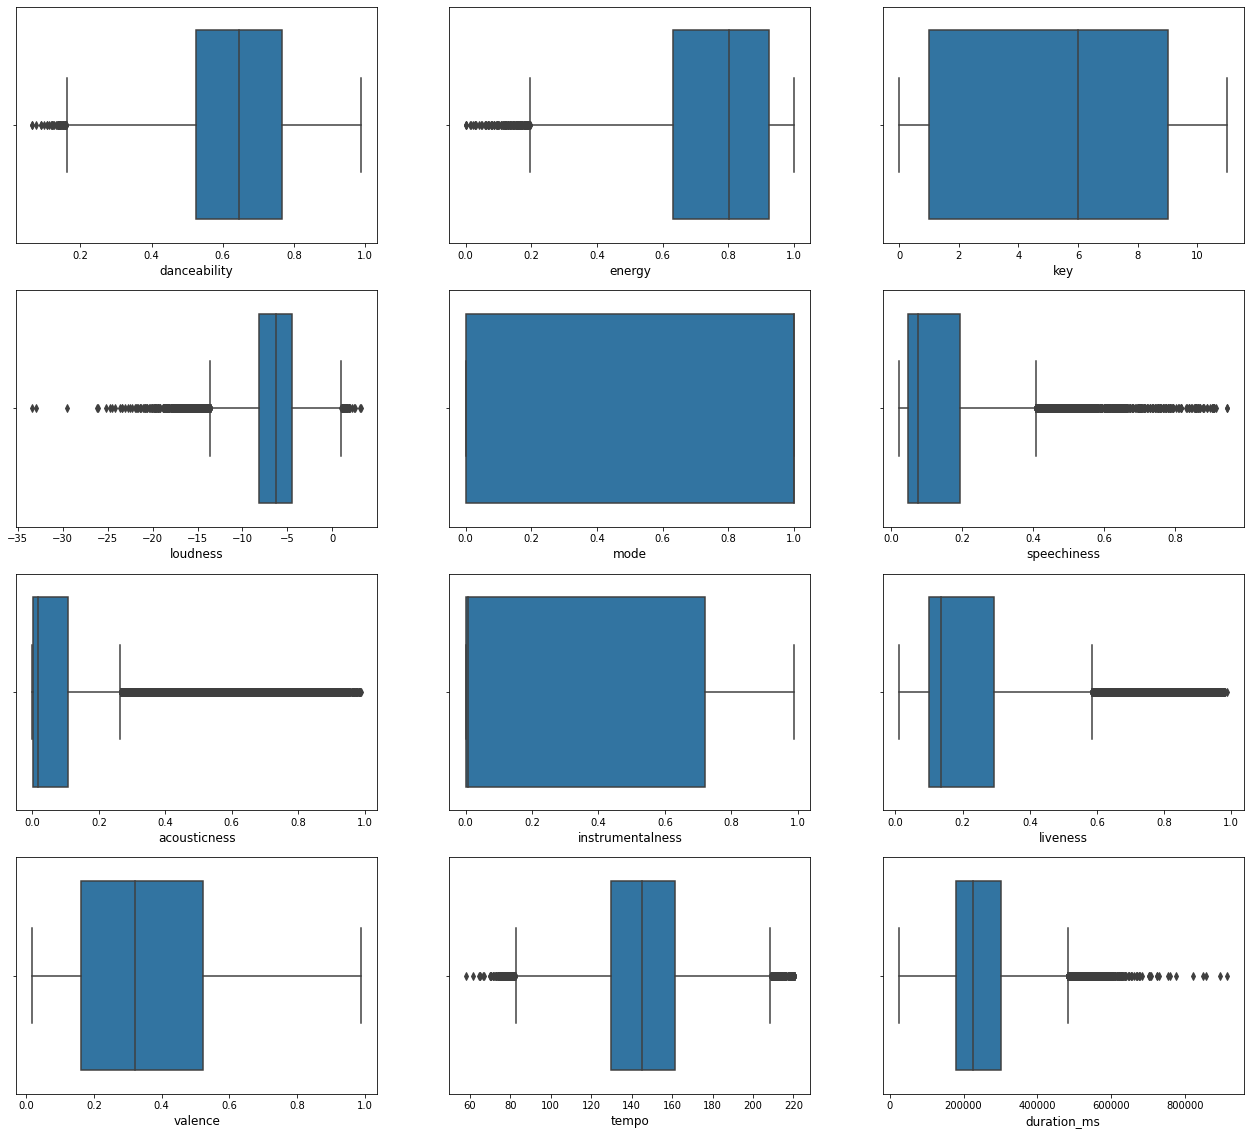

In [ ]:
plt.figure(figsize = (22,20))
for i in range (len(df_class.columns)-2):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x = df_class.iloc[:, i])
    plt.xlabel(df_class.columns[i], size = 12)


<h3> Analizziamo le distribuzioni coppia per coppia prendendo un sottoinsieme di 2000 campioni <h3>

In [ ]:
sns.pairplot(df_class.sample(2000), corner=True, hue='genre')
# hue è il valore in base al quale colora le campane nella distribuzione

Output hidden; open in https://colab.research.google.com to view.

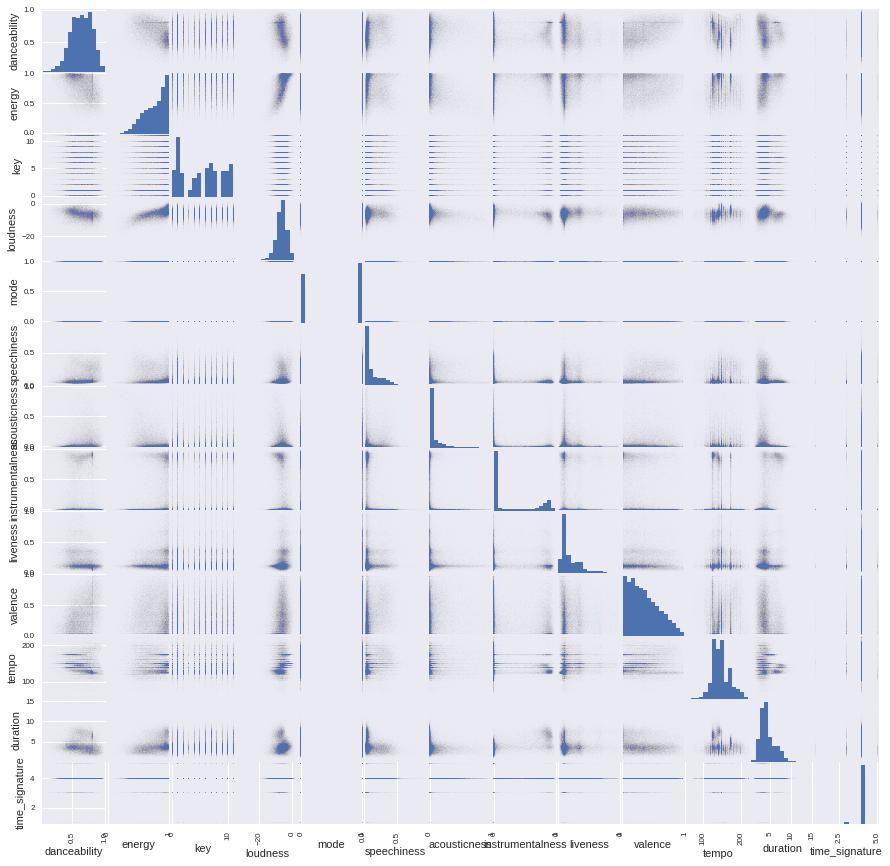

In [ ]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(df, marker = 'o', s=0.01, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

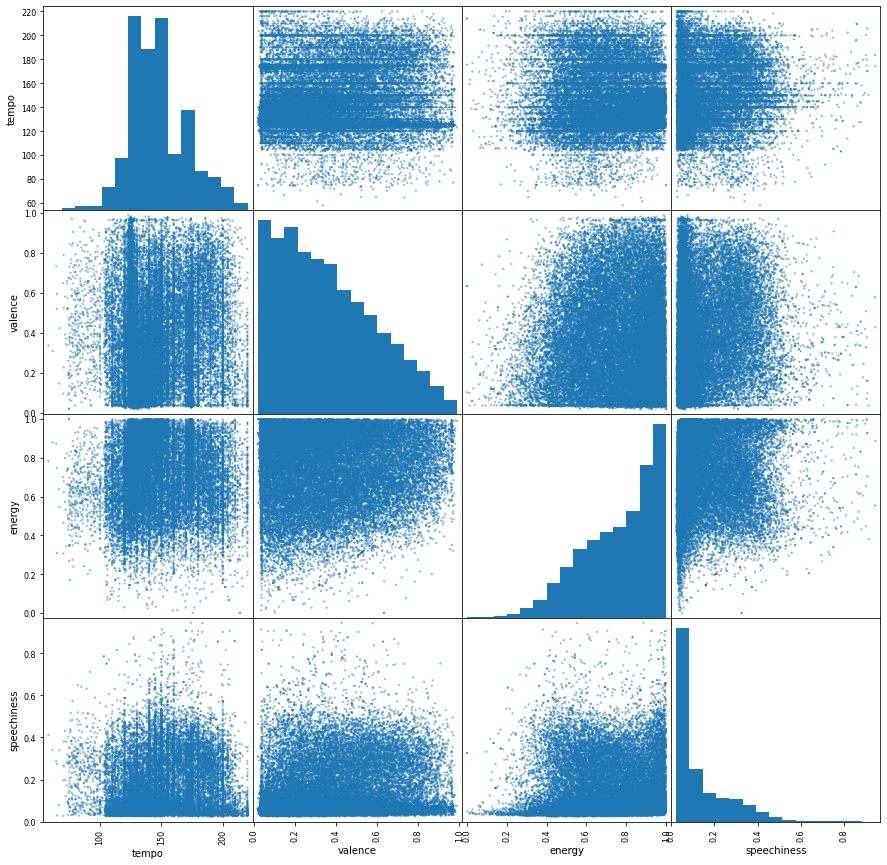

In [ ]:
aud = ['tempo', 'valence', 'energy', 'speechiness']
x_aud = df[aud]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_aud, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

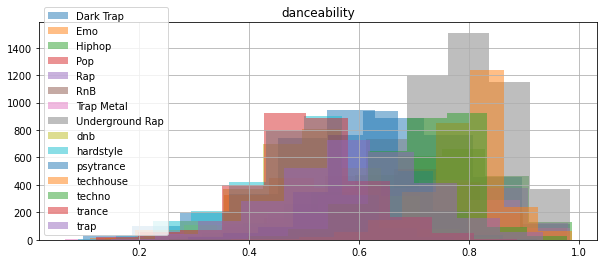

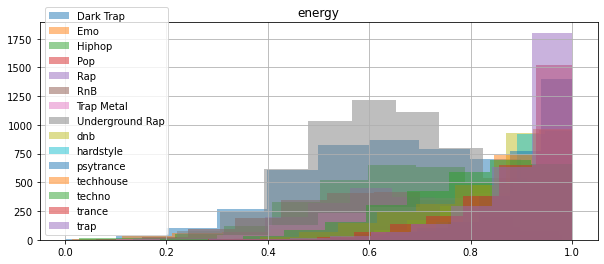

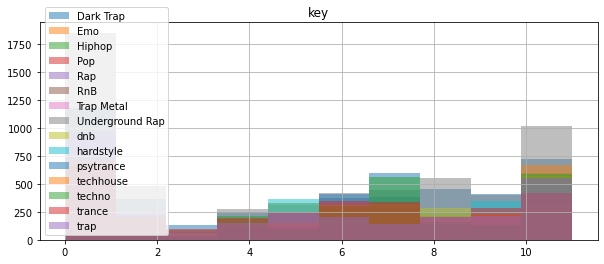

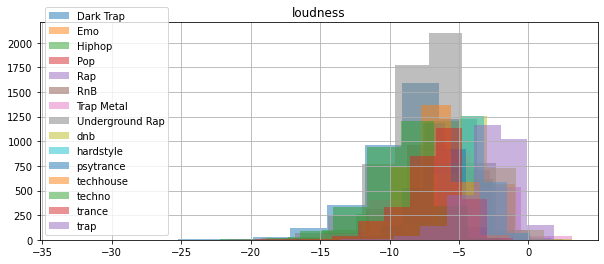

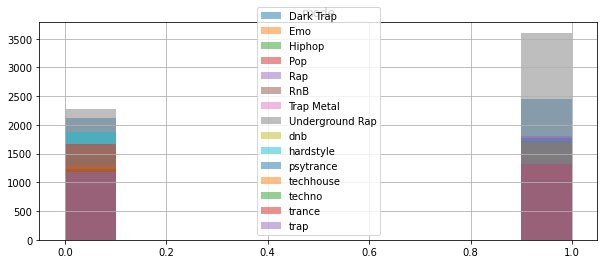

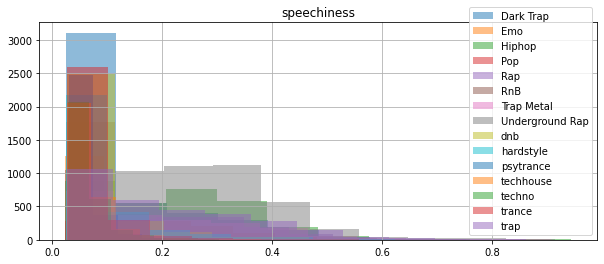

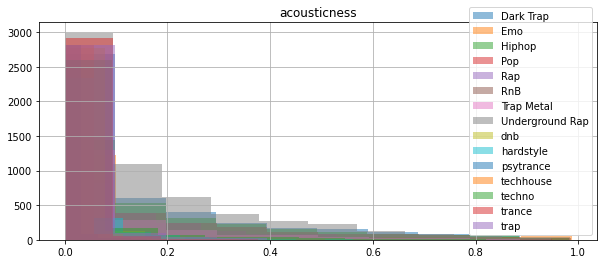

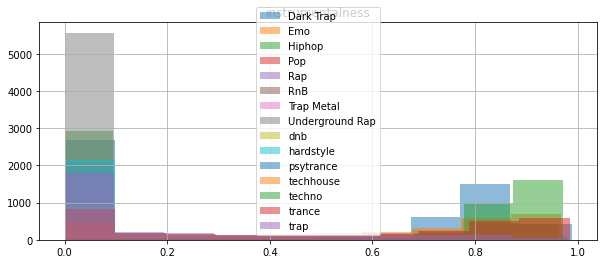

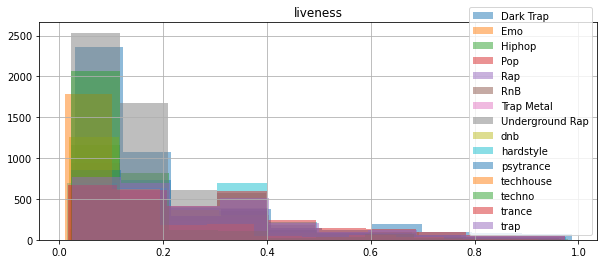

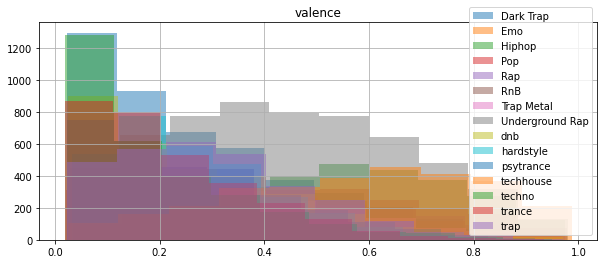

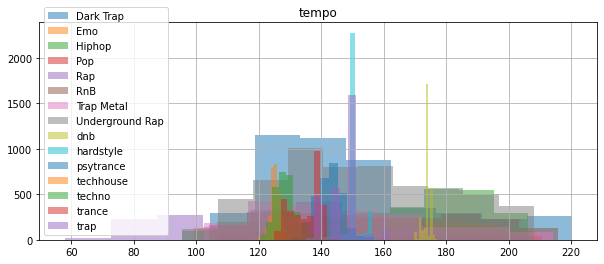

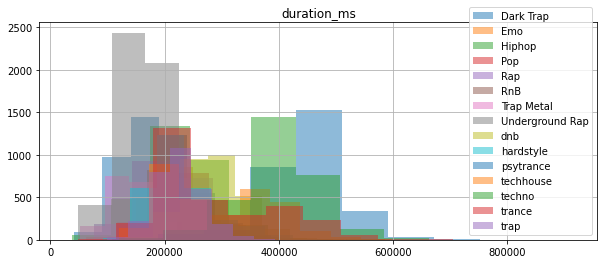

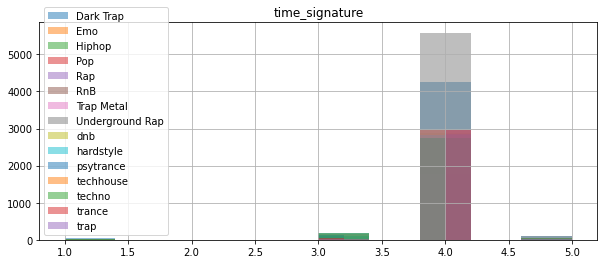

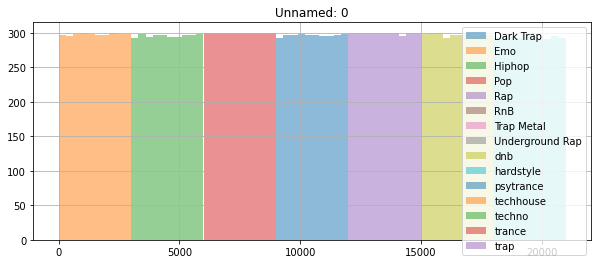

In [ ]:
# Distribuzioni delle feature raggruppate in base al genere
numeric = df._get_numeric_data()
grouped_genre = df.groupby('genre')

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha = 0.5, ax = ax, label = i, figsize = (10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

In [ ]:
grouped_genre.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,3.128414,3.961337
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,3.638619,3.938690
Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479,3.799244,3.975561
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,3.523189,3.984816
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,3.383544,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,3.773354,3.960934
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,2.453333,3.953476
Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521,2.935894,3.979915
dnb,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,4.775840,3.998314


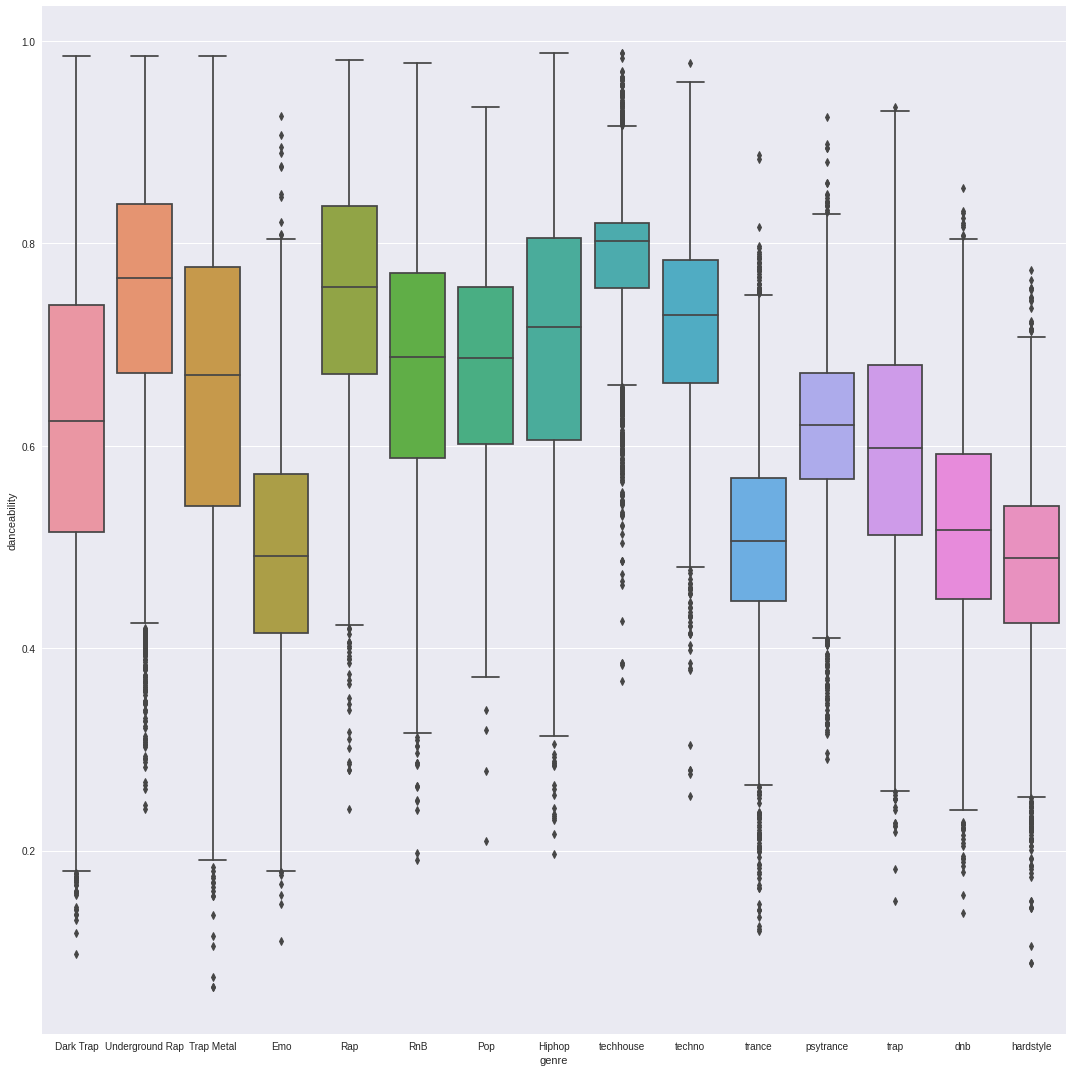

In [ ]:
style.use('seaborn')
sns.catplot(data = df, x = 'genre', y = 'danceability', kind = 'box', height = 15)

In [ ]:
px.box(data_frame = df, y = 'tempo', color = 'genre')

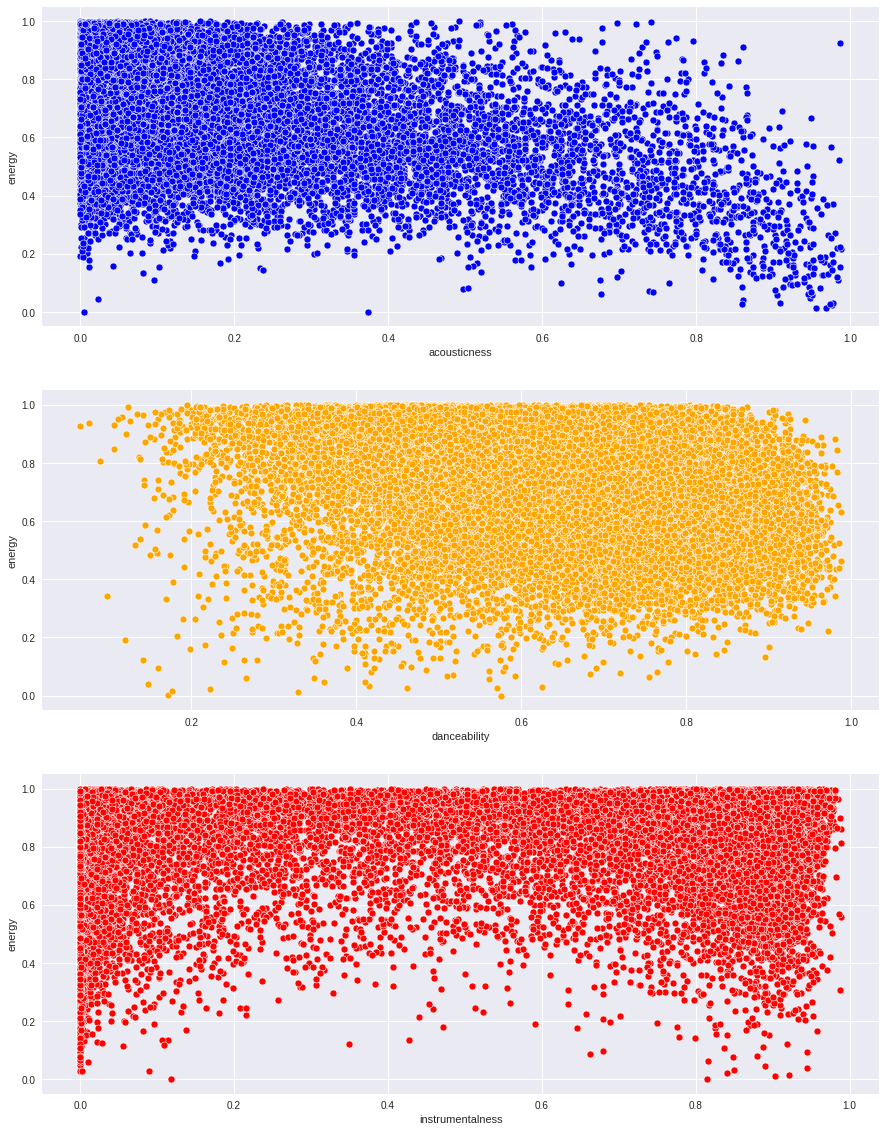

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15,20))
sns.scatterplot(x = df['acousticness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['danceability'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['instrumentalness'], y = df['energy'], ax = ax[2], color = "red")

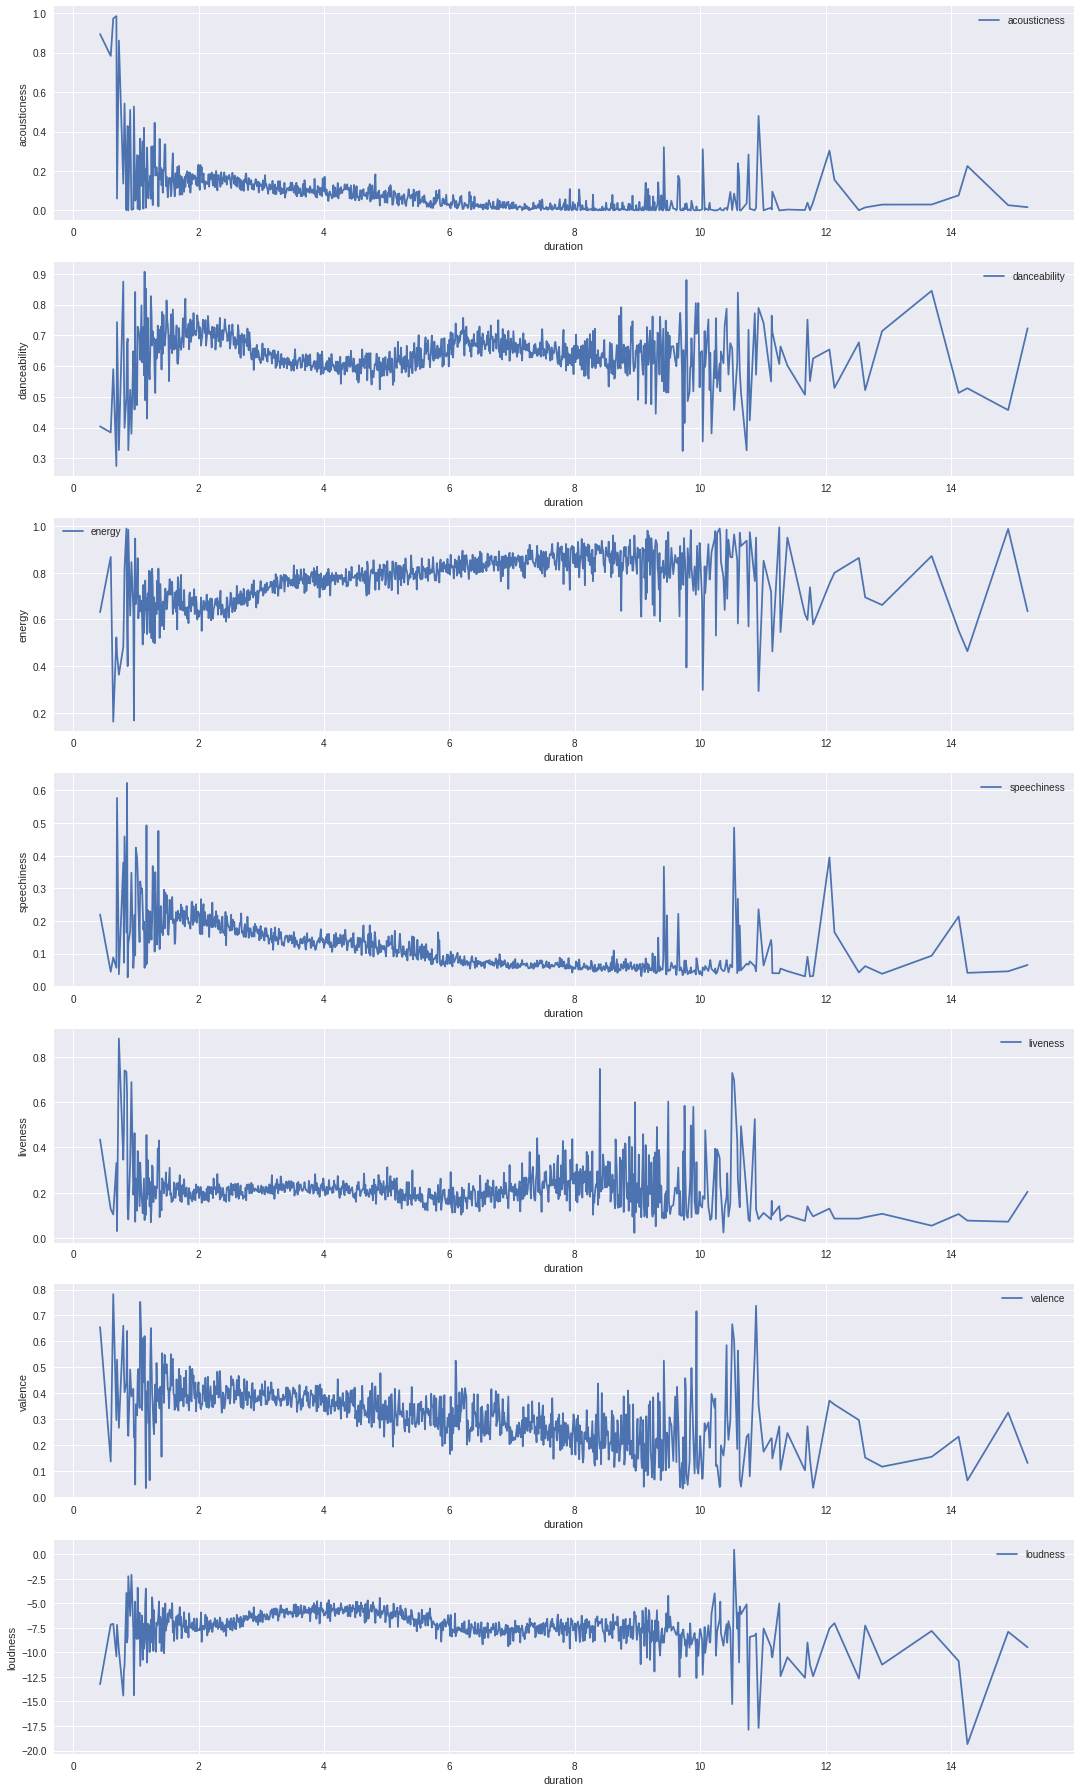

In [ ]:
fig, ax = plt.subplots(7, 1, figsize = (15, 25))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "loudness"]
i = 0
for col in columns:
    x = df.groupby("duration")[col].mean()
    sns.lineplot(x=x.index,y=x,label=col, ax = ax[i])
    i += 1
plt.tight_layout()

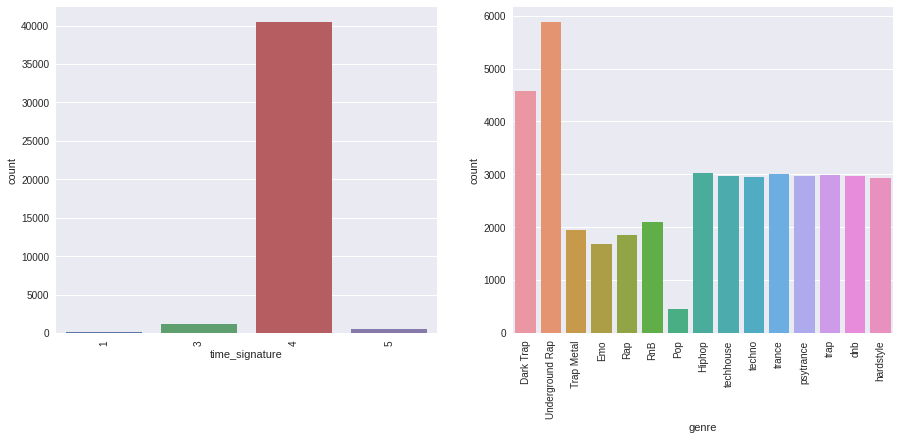

In [ ]:
categorical_cols = ['time_signature', 'genre']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

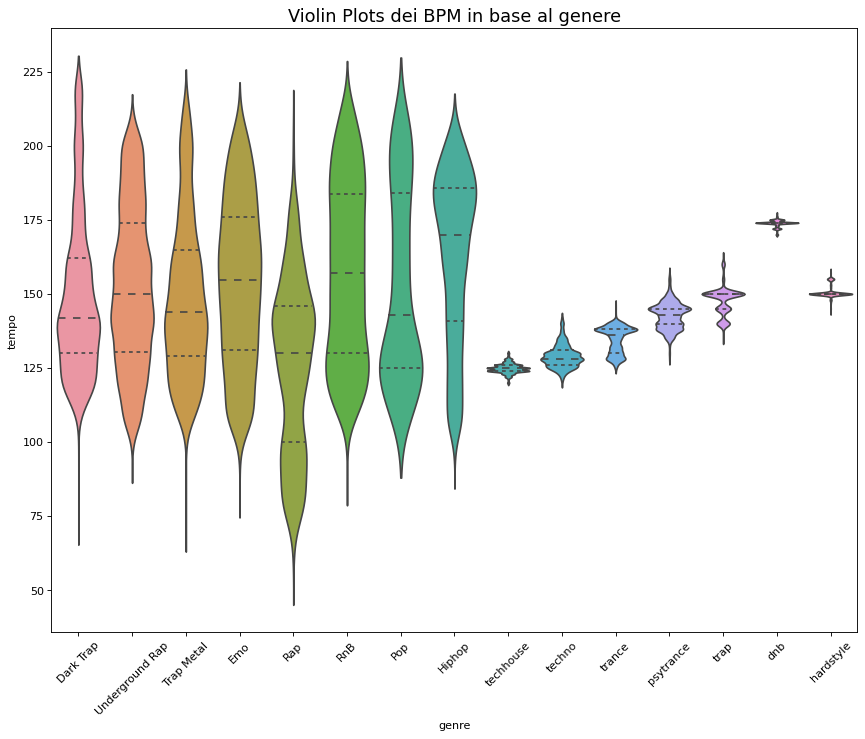

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='genre', y='tempo', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plots del Tempo in base al genere', fontsize=16)
plt.xticks(rotation=45)

plt.show()

<h3> Istogramma relativo ai generi <h3>

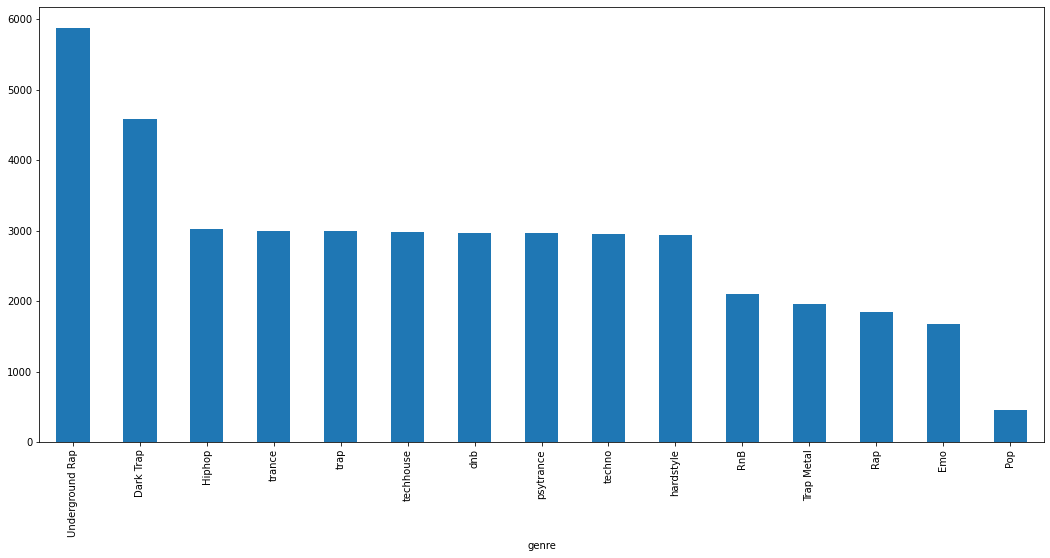

In [ ]:
df_class.groupby(['genre'])['genre'].count().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))
#df_class.groupby(['genre'])['genre'].count().sort_values(ascending=False)

<h3> Matrice di Correlazione <h3>

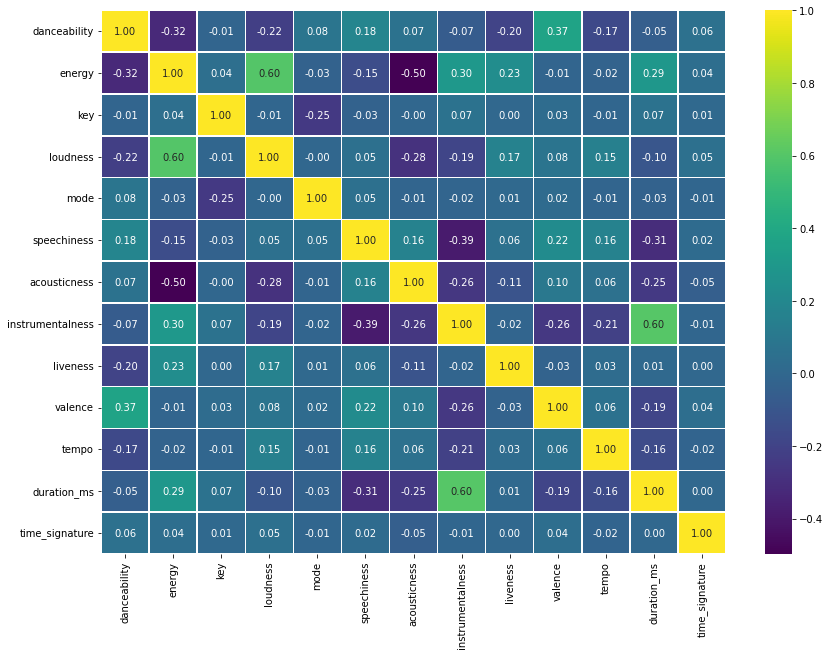

In [ ]:
corr_matrix=df_class.corr()
fig,ax=plt.subplots(figsize=(14,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="viridis");